# Ward

This notebook illustrates the hierarchical clustering of graphs by the [Ward method](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html), based on the spectral embedding of the graph.

In [1]:
import numpy as np
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

import networkx as nx
import sknetwork as skn

In [2]:
COLORS = ['r', 'b', 'g', 'c', 'm', 'y']

## Undirected graphs

**Loading**

In [19]:
adjacency = skn.data.karate_club()

**Clustering**

In [20]:
ward = skn.hierarchy.Ward()

In [21]:
dendrogram = ward.fit_transform(adjacency)

**Visualization**

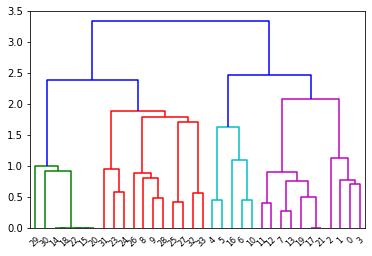

In [22]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram)

**Cuts of the dendrogram**

In [23]:
# default = 2 clusters
labels = skn.hierarchy.straight_cut(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [24]:
labels_unique, counts = np.unique(labels, return_counts = True)
print(labels_unique, counts)

[0 1] [18 16]


In [25]:
# cut with 4 clusters
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 4)
print(labels)

[1 1 1 1 3 3 3 1 0 0 3 1 1 1 2 2 3 1 2 1 2 1 2 0 0 0 0 0 0 2 2 0 0 0]


In [26]:
labels_unique, counts = np.unique(labels, return_counts = True)
print(labels_unique, counts)

[0 1 2 3] [11 11  7  5]


**Visualization**

In [27]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


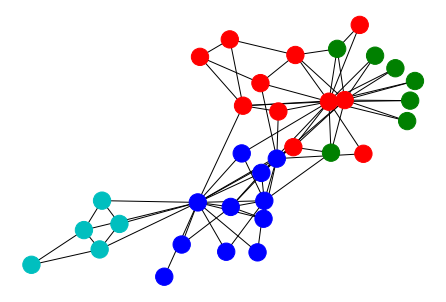

In [28]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph])

**Metrics**

In [29]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.5837104072398192

In [30]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.4342993247923885

**Parameters**

In [31]:
ward = skn.hierarchy.Ward(embedding_method=skn.embedding.Spectral(n_components=5))
ward.fit(adjacency)

Ward(embedding_method=Spectral(n_components=5, normalized_laplacian=True, regularization=0.01, relative_regularization=True, equalize=False, barycenter=True, normalize=True, solver=LanczosEig(which='LA')))

## Directed graphs

**Loading**

In [32]:
adjacency, names = skn.data.painters(return_labels=True)

**Clustering**

In [34]:
# treat directed graph as bipartite graph
biward = skn.hierarchy.BiWard()

In [35]:
biward.fit(adjacency)

BiWard(embedding_method=GSVD(n_components=10, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=True, solver=LanczosSVD()), cluster_row=True, cluster_col=False, cluster_both=False)

In [37]:
dendrogram = biward.dendrogram_

**Visualization**

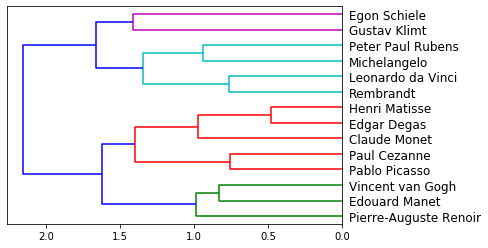

In [38]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram, labels = list(names.values()), orientation = 'left')

**Cuts of the dendrogram**

In [39]:
# cut with 3 clusters
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 3)
print(labels)

[0 0 1 0 1 1 2 0 0 1 0 0 0 2]


In [40]:
labels_unique, counts = np.unique(labels, return_counts = True)
print(labels_unique, counts)

[0 1 2] [8 4 2]


**Visualization**

In [41]:
graph = nx.from_scipy_sparse_matrix(adjacency)

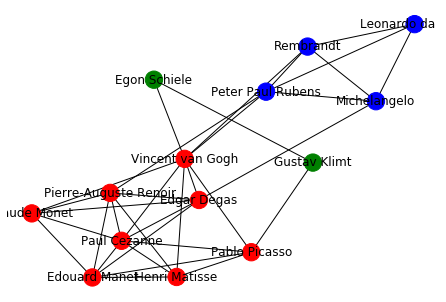

In [42]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph], labels = names)

**Metrics**

In [43]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.49857142857142855

In [44]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.48729193280825467

## Bipartite graphs

**Loading**

In [45]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)
biadjacency

<15x16 sparse matrix of type '<class 'numpy.int64'>'
	with 41 stored elements in Compressed Sparse Row format>

**Clustering**

In [46]:
biward = skn.hierarchy.BiWard(cluster_col = True, cluster_both = True)
biward.fit(biadjacency)

BiWard(embedding_method=GSVD(n_components=10, regularization=None, relative_regularization=True, factor_row=0.5, factor_col=0.5, singular_right=0.0, normalize=True, solver=LanczosSVD()), cluster_row=True, cluster_col=True, cluster_both=True)

In [49]:
dendrogram = biward.dendrogram_full_
dendrogram_movies = biward.dendrogram_row_
dendrogram_actors = biward.dendrogram_col_

**Visualization**

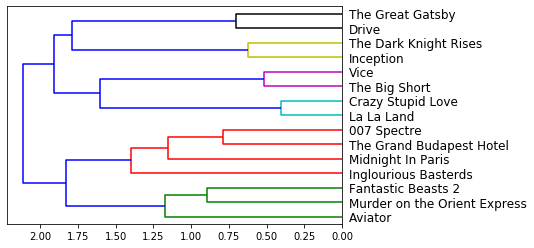

In [50]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram_movies, labels = list(movies.values()), orientation = 'left')

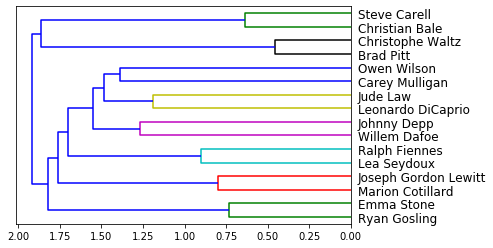

In [51]:
_ = show_dendrogram(dendrogram_actors, labels = list(actors.values()), orientation = 'left')

**Cuts of the dendrogram**

In [52]:
labels = skn.hierarchy.straight_cut(dendrogram, n_clusters = 4)
n1, n2 = biadjacency.shape
labels_row = labels[:n1]
labels_col = labels[n1:]

In [53]:
labels_unique, counts_row = np.unique(labels_row, return_counts = True)
_, counts_col = np.unique(labels_col, return_counts=True)
print(labels_unique, counts_row, counts_col)

[0 1 2 3] [8 4 2] [5 5 4 2]


**Visualization**

In [54]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [55]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [56]:
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [57]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

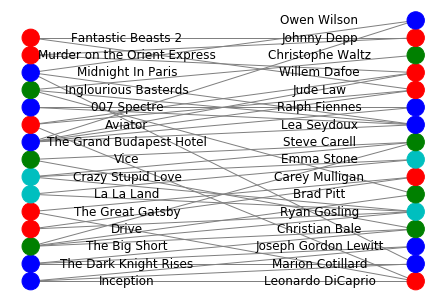

In [58]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels[i] % len(COLORS)] for i in graph], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)



